<a href="https://colab.research.google.com/github/ZoofishanChohan/Deep-Learning-and-Neural-Networks/blob/main/RNN_for_Time_Series_pridictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Dense, Input, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
series = np.sin(0.1*np.arange(200)) #+ np.random.randn(200)*0.1 #(adding random noise)

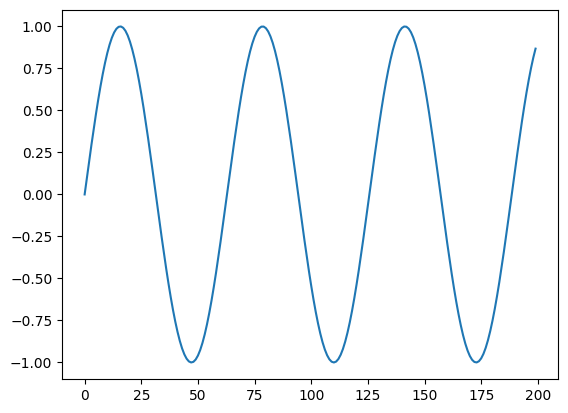

In [3]:
plt.plot(series)
plt.show()

In [10]:
## Building the dataset to pridict future values using T past values
T = 10
D = 1
X = []
Y = []
for t in range(len(series) -T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, D)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)


X.shape (190, 10, 1) Y.shape (190,)


In [32]:
i = Input(shape= (T, D))
x = SimpleRNN(5, activation = 'relu')(i)
x = Dense(1)(x)

model = Model(i, x)
model.compile(loss= 'mse', optimizer = Adam(learning_rate= 0.001))

r = model.fit(X[:N//2], Y[:N//2], epochs= 80, validation_data=(X[N//2:], Y[N//2:]))

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 0.4339 - val_loss: 0.5140
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4123 - val_loss: 0.4983
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2979 - val_loss: 0.4867
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3627 - val_loss: 0.4776
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3495 - val_loss: 0.4700
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2979 - val_loss: 0.4637
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3281 - val_loss: 0.4579
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3365 - val_loss: 0.4524
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3490 - val_loss: 0.4469
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3032 - val_loss: 0.4414
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3419 - val_loss: 0.4358
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3045 - val_loss: 0.4301


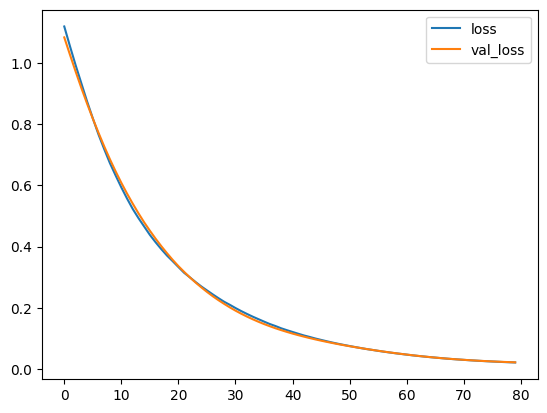

In [22]:
# Loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [24]:
# one step future forecast
validation_target = Y[N//2:]
validation_predictions = []
#index of first validation input
i = N//2
while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1, 1))[0,0]
    i += 1
    validation_predictions.append(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

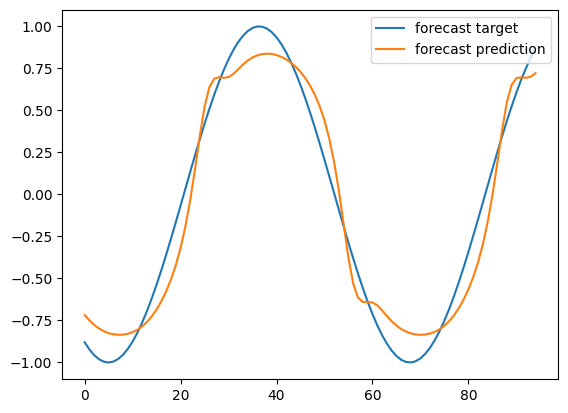

In [25]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()
plt.show()

In [33]:
# multiple steps future forecast
validation_target = Y[N//2:]
validation_predictions = []
#last train input
last_x = X[N//2] # 1-D array of length T
while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1, 1))[0,0]
    validation_predictions.append(p)
    #make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

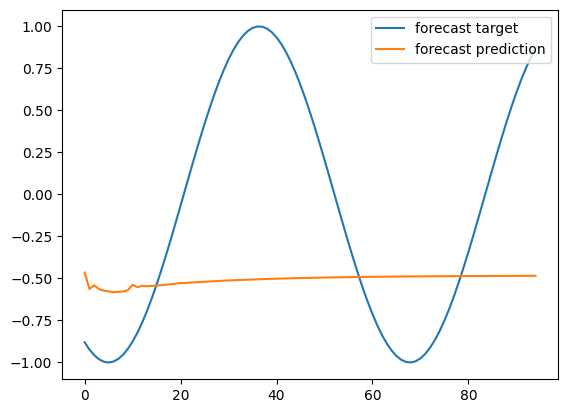

In [34]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()
plt.show()